In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fan_engagement_dataset.csv")

print("Dataset Overview:")
print(df.head())
print(df.info())


Dataset Overview:
   FanID  Age  Gender Location  SocialMediaLikes  SocialMediaShares  \
0      1   56  Female    Rural               222                 47   
1      2   46    Male    Rural               221                193   
2      3   32  Female    Urban                 2                135   
3      4   25    Male    Urban               477                 21   
4      5   38  Female    Rural                 5                  5   

   GameAttendance  MerchandisePurchases  AverageTicketPrice  \
0               0                    13           52.010837   
1               0                     3           30.820890   
2               0                    15           86.042144   
3               0                     0          112.278210   
4               1                    16           57.153280   

   TeamPerformanceScore EngagementLevel  
0                    59            High  
1                    50            High  
2                    91            High  
3       

In [3]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  
df["Location"] = label_encoder.fit_transform(df["Location"])  

df_features = df.drop(columns=["FanID", "EngagementLevel"])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

pca = PCA(n_components=2)  
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])

pca_df["EngagementLevel"] = df["EngagementLevel"]


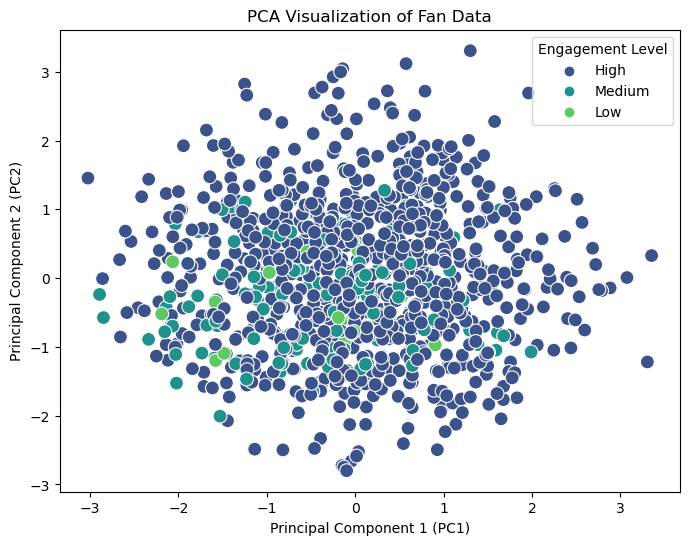

Explained Variance by Principal Components: [0.13195189 0.12263013]
Total Explained Variance: 25.46%


In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1", y="PC2", hue="EngagementLevel", data=pca_df, palette="viridis", s=100
)
plt.title("PCA Visualization of Fan Data")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Engagement Level")
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Principal Components: {explained_variance}")
print(f"Total Explained Variance: {explained_variance.sum() * 100:.2f}%")